In [128]:
import numpy as np
import pandas as pd


df = pd.read_json('/kaggle/input/cars-data-parsed/cars.json')
df.head(5)

,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Привод,Тип кузова,Пробег,Цвет,Владельцы,Руль,Поколение,Комплектация,URL
0,EXEED,LX,2022.0,1 940 000 ₽,"бензин, 1.5 л","147 л.с., налог",вариатор,передний,None,32 425 км,серый,1,левый,"1 поколение, рестайлинг",1.5 CVT Prestige,https://auto.drom.ru/moscow/cheryexeed/lx/2174...
1,Opel,Astra,2014.0,1 060 000 ₽,"бензин, 1.4 л","140 л.с., налог",АКПП,передний,хэтчбек 5 дв.,74 563 км,белый,None,левый,"4 поколение, рестайлинг",None,https://auto.drom.ru/moscow/opel/astra/2192898...
2,BMW,3-Series,2009.0,999 999 ₽,"бензин, 2.0 л","136 л.с., налог",АКПП,задний,седан,235 000 км,черный,4 и более,левый,"5 поколение, рестайлинг",318i AT Базовая,https://auto.drom.ru/moscow/bmw/3-series/66929...
3,Haval,H6,2019.0,1 500 000 ₽,"бензин, 1.5 л","143 л.с., налог",АКПП,передний,None,70 000 км,коричневый,2,левый,1 поколение,1.5 AT Elite,https://auto.drom.ru/moscow/haval/h6/493447831...
4,Chevrolet,Nexia,2023.0,733 000 ₽,"бензин, 1.5 л","106 л.с., налог",АКПП,передний,None,33 946 км,синий,1,левый,1 поколение,1.5 AT LT,https://auto.drom.ru/moscow/chevrolet/nexia/40...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Марка            2069 non-null   object 
 1   Модель           2069 non-null   object 
 2   Год выпуска      2069 non-null   float64
 3   Цена             2069 non-null   object 
 4   Двигатель        2064 non-null   object 
 5   Мощность         2060 non-null   object 
 6   Коробка передач  2064 non-null   object 
 7   Привод           2066 non-null   object 
 8   Тип кузова       1115 non-null   object 
 9   Пробег           2062 non-null   object 
 10  Цвет             2039 non-null   object 
 11  Владельцы        1800 non-null   object 
 12  Руль             2044 non-null   object 
 13  Поколение        1974 non-null   object 
 14  Комплектация     1203 non-null   object 
 15  URL              2075 non-null   object 
dtypes: float64(1), object(15)
memory usage: 259.5+ KB


In [130]:
df = df.dropna(subset=["Марка", "Модель", "Год выпуска", "Цена", "Пробег", "Мощность"])

df["Тип кузова"] = df["Тип кузова"].fillna("не указано")
df["Комплектация"] = df["Комплектация"].fillna("не указано")
df["Владельцы"] = df["Владельцы"].fillna("не указано")

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Марка            2053 non-null   object 
 1   Модель           2053 non-null   object 
 2   Год выпуска      2053 non-null   float64
 3   Цена             2053 non-null   object 
 4   Двигатель        2052 non-null   object 
 5   Мощность         2053 non-null   object 
 6   Коробка передач  2050 non-null   object 
 7   Привод           2052 non-null   object 
 8   Тип кузова       2053 non-null   object 
 9   Пробег           2053 non-null   object 
 10  Цвет             2025 non-null   object 
 11  Владельцы        2053 non-null   object 
 12  Руль             2028 non-null   object 
 13  Поколение        1959 non-null   object 
 14  Комплектация     2053 non-null   object 
 15  URL              2053 non-null   object 
dtypes: float64(1), object(15)
memory usage: 272.7+ KB


In [132]:
def clean_price(price_str):
    """Преобразует '1 940 000 ₽' в 1940000"""
    if pd.isna(price_str):
        return np.nan
    cleaned = price_str.replace(" ", "").replace("\xa0", "").replace("₽", "")
    return int(cleaned)

def clean_mileage(mileage_str):
    """Преобразует пробег в числовое значение, обрабатывая различные форматы"""
    if pd.isna(mileage_str):
        return np.nan
    
    cleaned = ''.join(c for c in mileage_str if c.isdigit() or c == ',')
    cleaned = cleaned.replace(',', '')
    
    if not cleaned:
        return 0
    
    try:
        return int(cleaned)
    except ValueError:
        return np.nan

def clean_power(power_str):
    """Извлекает число из мощности"""
    if pd.isna(power_str):
        return np.nan
    
    import re
    match = re.search(r'(\d+)', power_str)
    if match:
        return int(match.group(1))
    return np.nan


df["Цена"] = df["Цена"].apply(clean_price)
df["Пробег"] = df["Пробег"].apply(clean_mileage)
df["Мощность"] = df["Мощность"].apply(clean_power)
df.head(5)

,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Привод,Тип кузова,Пробег,Цвет,Владельцы,Руль,Поколение,Комплектация,URL
0,EXEED,LX,2022.0,1940000,"бензин, 1.5 л",147,вариатор,передний,не указано,32425,серый,1,левый,"1 поколение, рестайлинг",1.5 CVT Prestige,https://auto.drom.ru/moscow/cheryexeed/lx/2174...
1,Opel,Astra,2014.0,1060000,"бензин, 1.4 л",140,АКПП,передний,хэтчбек 5 дв.,74563,белый,не указано,левый,"4 поколение, рестайлинг",не указано,https://auto.drom.ru/moscow/opel/astra/2192898...
2,BMW,3-Series,2009.0,999999,"бензин, 2.0 л",136,АКПП,задний,седан,235000,черный,4 и более,левый,"5 поколение, рестайлинг",318i AT Базовая,https://auto.drom.ru/moscow/bmw/3-series/66929...
3,Haval,H6,2019.0,1500000,"бензин, 1.5 л",143,АКПП,передний,не указано,70000,коричневый,2,левый,1 поколение,1.5 AT Elite,https://auto.drom.ru/moscow/haval/h6/493447831...
4,Chevrolet,Nexia,2023.0,733000,"бензин, 1.5 л",106,АКПП,передний,не указано,33946,синий,1,левый,1 поколение,1.5 AT LT,https://auto.drom.ru/moscow/chevrolet/nexia/40...


In [133]:
df['Год выпуска'] = pd.to_numeric(df['Год выпуска'], errors='coerce').fillna(0).astype(int)
df.head()

,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Привод,Тип кузова,Пробег,Цвет,Владельцы,Руль,Поколение,Комплектация,URL
0,EXEED,LX,2022,1940000,"бензин, 1.5 л",147,вариатор,передний,не указано,32425,серый,1,левый,"1 поколение, рестайлинг",1.5 CVT Prestige,https://auto.drom.ru/moscow/cheryexeed/lx/2174...
1,Opel,Astra,2014,1060000,"бензин, 1.4 л",140,АКПП,передний,хэтчбек 5 дв.,74563,белый,не указано,левый,"4 поколение, рестайлинг",не указано,https://auto.drom.ru/moscow/opel/astra/2192898...
2,BMW,3-Series,2009,999999,"бензин, 2.0 л",136,АКПП,задний,седан,235000,черный,4 и более,левый,"5 поколение, рестайлинг",318i AT Базовая,https://auto.drom.ru/moscow/bmw/3-series/66929...
3,Haval,H6,2019,1500000,"бензин, 1.5 л",143,АКПП,передний,не указано,70000,коричневый,2,левый,1 поколение,1.5 AT Elite,https://auto.drom.ru/moscow/haval/h6/493447831...
4,Chevrolet,Nexia,2023,733000,"бензин, 1.5 л",106,АКПП,передний,не указано,33946,синий,1,левый,1 поколение,1.5 AT LT,https://auto.drom.ru/moscow/chevrolet/nexia/40...


In [134]:
import numpy as np
import pandas as pd
import re

df["Возраст"] = 2025 - df["Год выпуска"]

df["Объем двигателя"] = np.nan
df["Тип топлива"] = np.nan

for idx, engine in df["Двигатель"].items():
    if pd.isna(engine) or engine == "None":
        continue
        
    parts = [p.strip() for p in str(engine).split(",")]
    
    if len(parts) == 2 and "л" in parts[1]:
        df.at[idx, "Объем двигателя"] = float(parts[1].replace(" л", ""))
        df.at[idx, "Тип топлива"] = parts[0]
    
    elif len(parts) == 2 and ("гибрид" in parts[1].lower() or "электро" in parts[1].lower()):
        df.at[idx, "Объем двигателя"] = float(parts[0].replace(" л", ""))
        df.at[idx, "Тип топлива"] = "гибрид" if "гибрид" in parts[1].lower() else "электро"
    
    elif "л" in engine:
        vol_part = engine.replace(" л", "")
        try:
            df.at[idx, "Объем двигателя"] = float(vol_part)
            df.at[idx, "Тип топлива"] = "не указано"
        except ValueError:
            pass
    
    elif "электро" in engine.lower():
        df.at[idx, "Тип топлива"] = "электро"

df["Тип КПП"] = df["Коробка передач"].str.extract(r"(АКПП|МКПП|вариатор|робот)", flags=re.IGNORECASE)
df.head(5)

/tmp/ipykernel_36/2110298437.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'бензин' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "Тип топлива"] = parts[0]


,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Привод,Тип кузова,Пробег,Цвет,Владельцы,Руль,Поколение,Комплектация,URL,Возраст,Объем двигателя,Тип топлива,Тип КПП
0,EXEED,LX,2022,1940000,"бензин, 1.5 л",147,вариатор,передний,не указано,32425,серый,1,левый,"1 поколение, рестайлинг",1.5 CVT Prestige,https://auto.drom.ru/moscow/cheryexeed/lx/2174...,3,1.5,бензин,вариатор
1,Opel,Astra,2014,1060000,"бензин, 1.4 л",140,АКПП,передний,хэтчбек 5 дв.,74563,белый,не указано,левый,"4 поколение, рестайлинг",не указано,https://auto.drom.ru/moscow/opel/astra/2192898...,11,1.4,бензин,АКПП
2,BMW,3-Series,2009,999999,"бензин, 2.0 л",136,АКПП,задний,седан,235000,черный,4 и более,левый,"5 поколение, рестайлинг",318i AT Базовая,https://auto.drom.ru/moscow/bmw/3-series/66929...,16,2.0,бензин,АКПП
3,Haval,H6,2019,1500000,"бензин, 1.5 л",143,АКПП,передний,не указано,70000,коричневый,2,левый,1 поколение,1.5 AT Elite,https://auto.drom.ru/moscow/haval/h6/493447831...,6,1.5,бензин,АКПП
4,Chevrolet,Nexia,2023,733000,"бензин, 1.5 л",106,АКПП,передний,не указано,33946,синий,1,левый,1 поколение,1.5 AT LT,https://auto.drom.ru/moscow/chevrolet/nexia/40...,2,1.5,бензин,АКПП


In [135]:
df['Владельцы'] = df['Владельцы'].replace({
    '1': 1,
    '2': 2,
    '3': 3,
    '4 и более': 4,
    'не указано': -1,
    None: -1
}).astype(int)

df.head(5)

/tmp/ipykernel_36/70593641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Владельцы'] = df['Владельцы'].replace({


,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Привод,Тип кузова,Пробег,Цвет,Владельцы,Руль,Поколение,Комплектация,URL,Возраст,Объем двигателя,Тип топлива,Тип КПП
0,EXEED,LX,2022,1940000,"бензин, 1.5 л",147,вариатор,передний,не указано,32425,серый,1,левый,"1 поколение, рестайлинг",1.5 CVT Prestige,https://auto.drom.ru/moscow/cheryexeed/lx/2174...,3,1.5,бензин,вариатор
1,Opel,Astra,2014,1060000,"бензин, 1.4 л",140,АКПП,передний,хэтчбек 5 дв.,74563,белый,-1,левый,"4 поколение, рестайлинг",не указано,https://auto.drom.ru/moscow/opel/astra/2192898...,11,1.4,бензин,АКПП
2,BMW,3-Series,2009,999999,"бензин, 2.0 л",136,АКПП,задний,седан,235000,черный,4,левый,"5 поколение, рестайлинг",318i AT Базовая,https://auto.drom.ru/moscow/bmw/3-series/66929...,16,2.0,бензин,АКПП
3,Haval,H6,2019,1500000,"бензин, 1.5 л",143,АКПП,передний,не указано,70000,коричневый,2,левый,1 поколение,1.5 AT Elite,https://auto.drom.ru/moscow/haval/h6/493447831...,6,1.5,бензин,АКПП
4,Chevrolet,Nexia,2023,733000,"бензин, 1.5 л",106,АКПП,передний,не указано,33946,синий,1,левый,1 поколение,1.5 AT LT,https://auto.drom.ru/moscow/chevrolet/nexia/40...,2,1.5,бензин,АКПП


In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

df['Владельцы'] = df['Владельцы'].fillna('не указано')
df['Комплектация'] = df['Комплектация'].fillna('не указано')

le_make = LabelEncoder()
le_model = LabelEncoder()
le_kompl = LabelEncoder()
df['Комплектация'] = le_kompl.fit_transform(df['Комплектация'])
df['Марка_код'] = le_make.fit_transform(df['Марка'])
df['Модель_код'] = le_model.fit_transform(df['Модель'])

cat_cols = ['Тип кузова', 'Привод', 'Тип КПП', 'Тип топлива', 'Руль', 'Цвет']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df['Поколение_номер'] = df['Поколение'].str.extract(r'(\d+)').fillna(0).astype(int)

df['Мощность/Объем'] = df['Мощность'] / df['Объем двигателя']

df['Новый'] = (df['Пробег'] < 1000).astype(int)
df.head()

,Марка,Модель,Год выпуска,Цена,Двигатель,Мощность,Коробка передач,Пробег,Владельцы,Поколение,...,Цвет_оранжевый,Цвет_розовый,Цвет_серебристый,Цвет_серый,Цвет_синий,Цвет_фиолетовый,Цвет_черный,Поколение_номер,Мощность/Объем,Новый
0,EXEED,LX,2022,1940000,"бензин, 1.5 л",147,вариатор,32425,1,"1 поколение, рестайлинг",...,False,False,False,True,False,False,False,1,98.000000,0
1,Opel,Astra,2014,1060000,"бензин, 1.4 л",140,АКПП,74563,-1,"4 поколение, рестайлинг",...,False,False,False,False,False,False,False,4,100.000000,0
2,BMW,3-Series,2009,999999,"бензин, 2.0 л",136,АКПП,235000,4,"5 поколение, рестайлинг",...,False,False,False,False,False,False,True,5,68.000000,0
3,Haval,H6,2019,1500000,"бензин, 1.5 л",143,АКПП,70000,2,1 поколение,...,False,False,False,False,False,False,False,1,95.333333,0
4,Chevrolet,Nexia,2023,733000,"бензин, 1.5 л",106,АКПП,33946,1,1 поколение,...,False,False,False,False,True,False,False,1,70.666667,0


In [137]:
features = ['Год выпуска', 'Мощность', 'Пробег', 'Владельцы', 'Комплектация',
       'Возраст', 'Объем двигателя', 'Марка_код', 'Модель_код',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_купе', 'Тип кузова_лифтбек',
       'Тип кузова_минивэн', 'Тип кузова_не указано', 'Тип кузова_открытый',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Привод_задний', 'Привод_передний',
       'Тип КПП_вариатор', 'Тип КПП_робот', 'Тип топлива_гибрид',
       'Тип топлива_дизель', 'Тип топлива_не указано', 'Руль_правый',
       'Цвет_белый', 'Цвет_бордовый', 'Цвет_голубой', 'Цвет_желтый',
       'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый', 'Цвет_красный',
       'Цвет_оранжевый', 'Цвет_розовый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Поколение_номер',
        'Мощность/Объем', 'Новый']

target = 'Цена'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import joblib
joblib.dump(le_make, 'le_make.pkl')
joblib.dump(le_model, 'le_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1642, 45)
Размер тестовой выборки: (411, 45)


In [150]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mae:.2f} ₽")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ₽")
print(f"R² Score: {r2:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
MAE: 570423.40 ₽
MSE: 2690412258102.83
RMSE: 1640247.62 ₽
R² Score: 0.7539


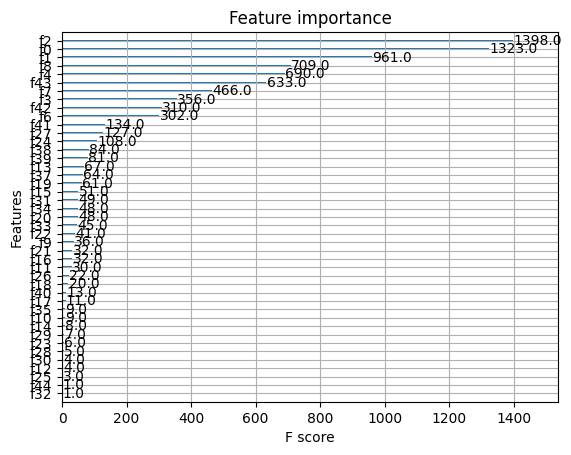

In [151]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

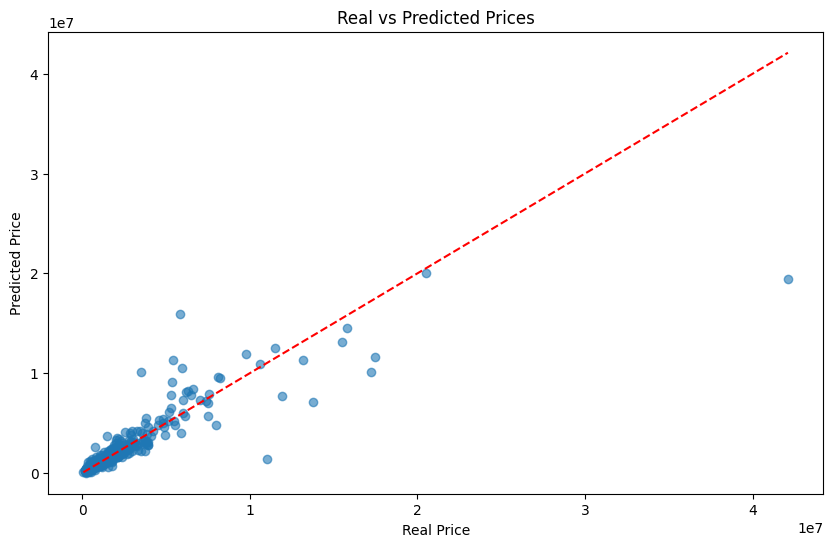

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs Predicted Prices')
plt.show()

In [154]:
import pickle

with open("cars_best_model.pkl", "wb") as f:
    pickle.dump(grid_search, f)